# Analisis multiple linear regression pengaruh T2M_MIN,	T2M_MAX, T2M_RANGE,	T2MWET,	T2MDEW,	T2M terhadap TS di Kota Palembang tahun 1991 sampai 2020
#### T2M_MIN: Suhu minimum pada ketinggian 2 meter.
#### T2M_MAX: Suhu maksimum pada ketinggian 2 meter.
#### T2M_RANGE: Rentang suhu (selisih antara suhu maksimum dan minimum) pada ketinggian 2 meter.
#### T2MWET: Suhu basah pada ketinggian 2 meter (Wet-bulb temperature), yakni suhu terendah yang dapat dicapai oleh permukaan air yang menguap ke udara pada ketinggian tersebut.
#### T2MDEW: Suhu titik embun (dew point) pada ketinggian 2 meter, yaitu suhu di mana uap air mulai mengembun menjadi titik-titik air.
#### T2M: Suhu rata-rata pada ketinggian 2 meter.

In [269]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Contoh dataset (gantilah ini dengan dataset yang sebenarnya)

data = pd.read_csv('dataskynew.csv')

# Membuat DataFrame dari dataset
df = pd.DataFrame(data)

# Variabel independen (YEAR, MO, DY, TS)
X = df[['T2M', 'T2M_MIN', 'T2M_MAX', 'T2M_RANGE', 'T2MWET', 'T2MDEW']]

# Variabel dependen (TS)
y = df['TS']

# Membuat model Multiple Linear Regression
model = LinearRegression()

# Melatih model dengan data training
model.fit(X, y)

# Memprediksi data testing
y_pred = model.predict(X)


In [270]:
df

,DATE,T2M,T2M_MIN,T2M_MAX,T2M_RANGE,T2MWET,T2MDEW,TS
0,1991-01-01,25.69,23.65,28.69,5.03,24.83,23.97,25.76
1,1991-01-02,25.85,23.49,29.25,5.76,24.77,23.69,25.96
2,1991-01-03,25.74,23.29,29.28,5.99,24.76,23.76,25.88
3,1991-01-04,25.66,23.55,28.64,5.09,24.90,24.14,25.76
4,1991-01-05,25.64,23.62,28.48,4.87,24.83,24.04,25.74
...,...,...,...,...,...,...,...,...
10953,2020-12-27,25.80,23.38,28.85,5.48,24.98,24.17,25.86
10954,2020-12-28,25.45,23.76,27.63,3.87,24.82,24.18,25.37
10955,2020-12-29,24.80,22.45,27.91,5.47,23.98,23.14,24.87
10956,2020-12-30,25.62,23.29,28.69,5.40,24.83,24.04,25.71


In [271]:
y_pred

array([25.70778296, 25.90477053, 25.83114769, ..., 24.80457962,
       25.64533057, 24.66120884])

In [273]:
r2_score(y, y_pred)

0.9785938289774616

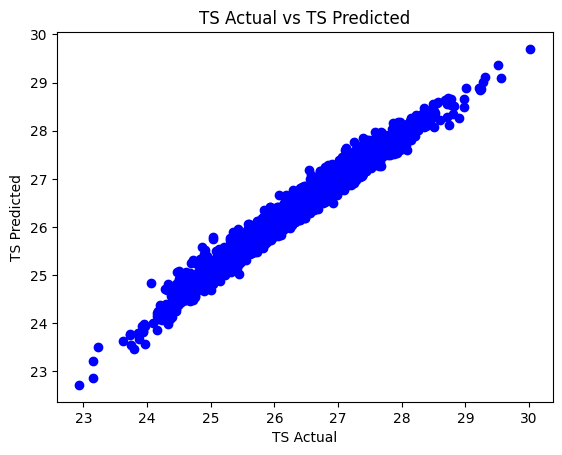

In [274]:
# buatlah visualisasi scatter dan garis regresi dari model yang telah dibuat

import matplotlib.pyplot as plt

plt.scatter(y, y_pred, color='blue')

plt.title('TS Actual vs TS Predicted')
plt.xlabel('TS Actual')
plt.ylabel('TS Predicted')
plt.show()

In [275]:
import statsmodels.api as sm
# Menambahkan konstanta untuk model
X = sm.add_constant(X)

# Membuat model regresi
model = sm.OLS(y, X).fit()

# Menampilkan ringkasan hasil regresi
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     TS   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                 8.344e+04
Date:                Wed, 16 Oct 2024   Prob (F-statistic):               0.00
Time:                        14:54:37   Log-Likelihood:                 8571.9
No. Observations:               10958   AIC:                        -1.713e+04
Df Residuals:                   10951   BIC:                        -1.708e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2334      0.043    -28.793      0.0